# Test Filter 2d

## Read Image

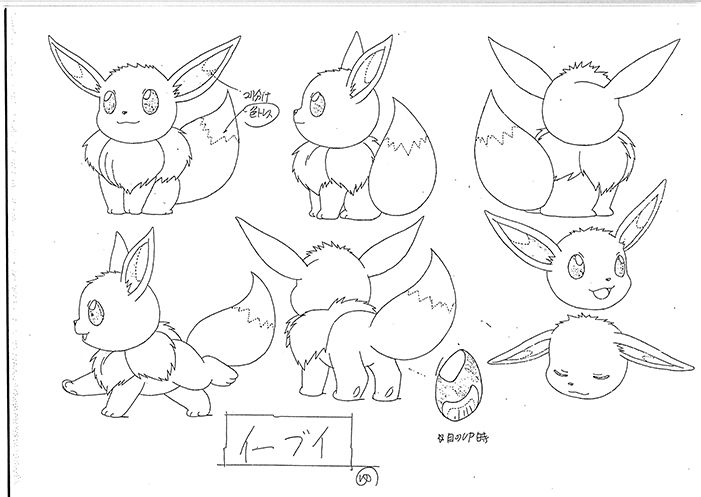

In [190]:
import PIL.Image as image
import numpy as np
import cv2

filename = "eeve.jpeg"
img = image.open(filename).convert('L')
inframe = np.array(img)

img

In [191]:
img.width

701

In [192]:
kernel_g = {
        'laplacian high-pass':  np.array([
            [0.0, 1.0, 0],
            [1.0, -4, 1.0],
            [0, 1.0, 0.0]],np.float32),
        'gaussian high-pass': np.array([
            [-0.0625,-0.125,-0.0625],
            [-0.125,0.75,-0.125],
            [-0.0625,-0.125,-0.0625]],np.float32),
        'average blur':  np.ones((3,3),np.float32)/9.0,
        'gaussian blur': np.array([
            [0.0625,0.125,0.0625],
            [0.125,0.25,0.125],
            [0.0625,0.125,0.0625]],np.float32),
        'Sobel Ver': np.array([
            [1.0,0.0,-1.0],
            [2.0,0.0,-2.0],
            [1.0,0.0,-1.0]],np.float32),
        'Sobel Hor': np.array([
            [1.0,2.0,1.0],
            [0.0,0.0,0.0],
            [-1.0,-2.0,-1.0]],np.float32),
        'motion blur': np.array([
            [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]],np.float32)/12,
        'Sharpen': np.array([
            [0,-1,0],
            [-1, 5, -1],
            [0, -1, 0]],np.float32),
        'Edge1': np.array([
            [0,1,0],
            [1, -4, 1],
            [0, 1, 0]],np.float32),
        'Edge2': np.array([
            [0,-1,0],
            [-1, 4, -1],
            [0, -1, 0]],np.float32),
        'Edge3': np.array([
            [-1,-1,-1],
            [-1, 8, -1],
            [-1, -1, -1]],np.float32),
}

kernelD = np.ones((3,3),np.uint8)
buf     = np.ones((img.height,img.width),np.uint8)


# implement in FPGA
def test_filter(kernelName):
    kernelVoid = np.zeros(0)
    inframe = np.array(img)
    frame = cv2.filter2D(inframe, -1, kernel_g.get(kernelName), dst=buf)
#     cv2.dilate(buf, kernelVoid, dst=output, borderType=cv2.BORDER_CONSTANT)
    return buf

# edited
def apply_filter(img_in, kernel):
    kernelVoid = np.zeros(0)
    frame = cv2.filter2D(img_in, -1, kernel, dst=buf)
    return frame

In [193]:
# show kernel
kernel_g.get('Edge3')

array([[-1., -1., -1.],
       [-1.,  8., -1.],
       [-1., -1., -1.]], dtype=float32)

Test Filter

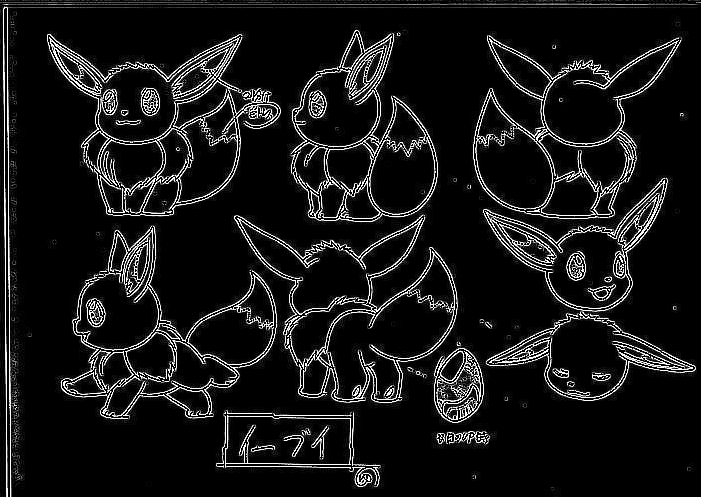

In [194]:
output = test_filter('Edge3')
image.fromarray(output)

In [195]:
print(inframe)
print(output)

[[235 239 228 ... 210 207 202]
 [221 233 231 ... 203 201 198]
 [255 255 252 ... 246 248 250]
 ...
 [255 252 255 ... 255 255 255]
 [255 252 255 ... 255 255 255]
 [254 255 255 ... 255 255 255]]
[[ 28  79   0 ...  47  40   2]
 [  0   0   0 ...   0   0   0]
 [ 82  95  64 ... 130 137 152]
 ...
 [ 16   0   8 ...   0   0   0]
 [ 13   0   8 ...   0   0   0]
 [  4   7   8 ...   0   0   0]]


## Canny Edge Detection

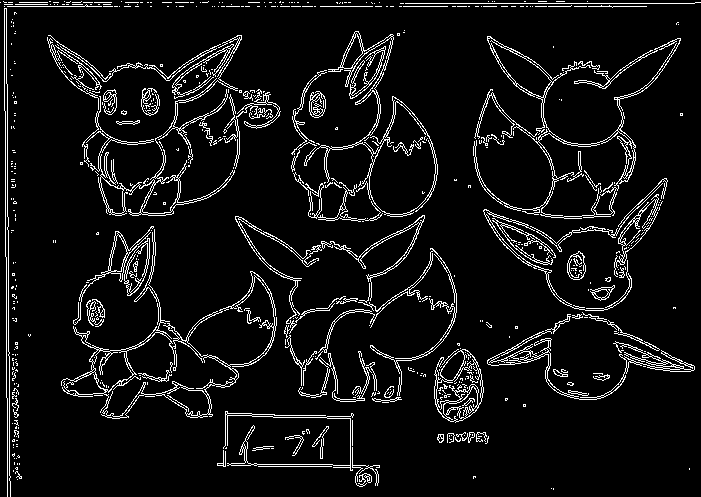

In [196]:
edges = cv2.Canny(np.array(img),100,100)
image.fromarray(edges)

## Test Edge Detection 
. blur image then apply laplace filter

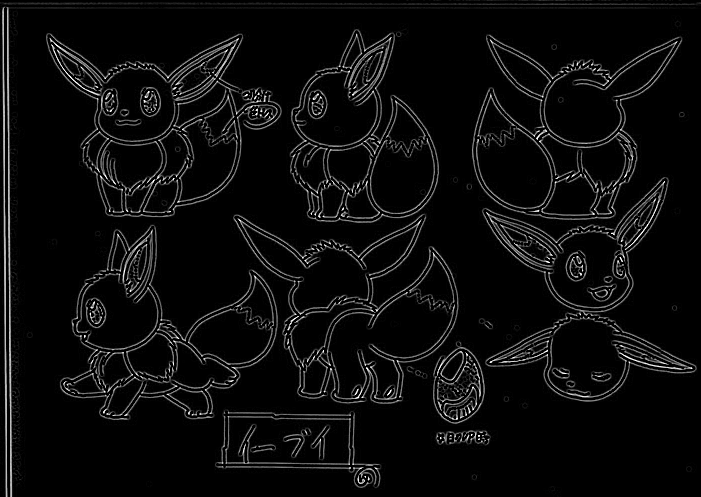

In [197]:
img2 = apply_filter(inframe, kernel_g.get('gaussian blur'))
img2 = apply_filter(img2, kernel_g.get('Edge3'))
image.fromarray(img2)

In [198]:
# perbedaannya
print(edges)
print()
print(img2)

[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [255   0   0 ... 255 255 255]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]

[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [23 15 20 ... 20 30 27]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]


## Costumize

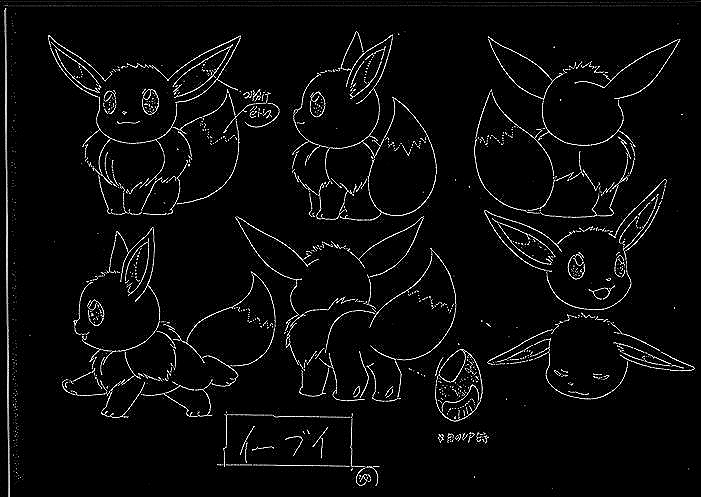

In [199]:
filename = "eeve.jpeg"
imgs = image.open(filename).convert('L')
# imgs = image.open(filename)

inframe1 = np.array(imgs)

thekernel = np.array([
            [-1,-1,-1],
            [-1, 17, -1],
            [-1, -1, -1]],np.float32)

img3 = apply_filter(inframe1, kernel_g.get('Edge1'))
# img3 = apply_filter(inframe1, kernel_g.get('Sharpen'))
# img3 = apply_filter(img3, kernel_g.get('average blur'))
# img3 = apply_filter(img3, kernel_g.get('Edge3'))
# img3 = cv2.Canny(img3, 100, 200)
image.fromarray(img3)

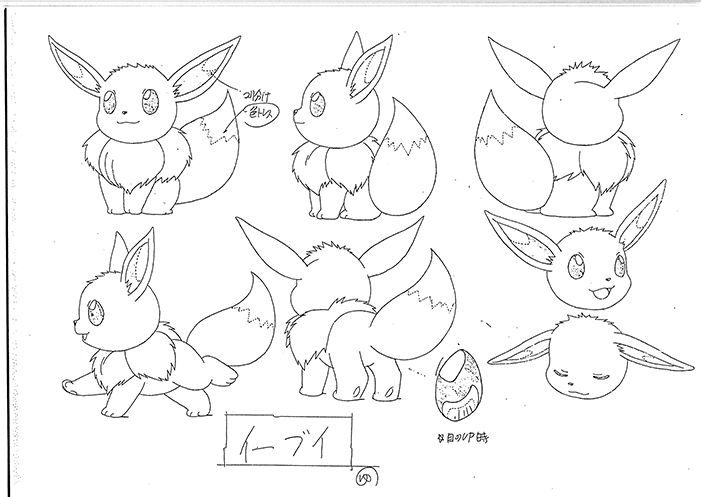

In [200]:
image.fromarray(inframe1)

In [201]:
print(inframe)
print()
print(img3)

[[235 239 228 ... 210 207 202]
 [221 233 231 ... 203 201 198]
 [255 255 252 ... 246 248 250]
 ...
 [255 252 255 ... 255 255 255]
 [255 252 255 ... 255 255 255]
 [254 255 255 ... 255 255 255]]

[[ 0  0 23 ...  0  0  2]
 [72 14 22 ... 48 52 62]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  7  0 ...  0  0  0]
 [ 0  9  0 ...  0  0  0]
 [ 4  0  0 ...  0  0  0]]
